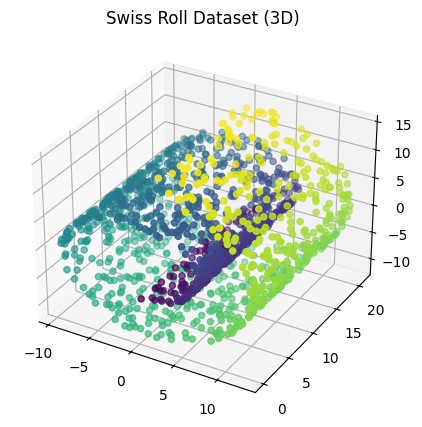

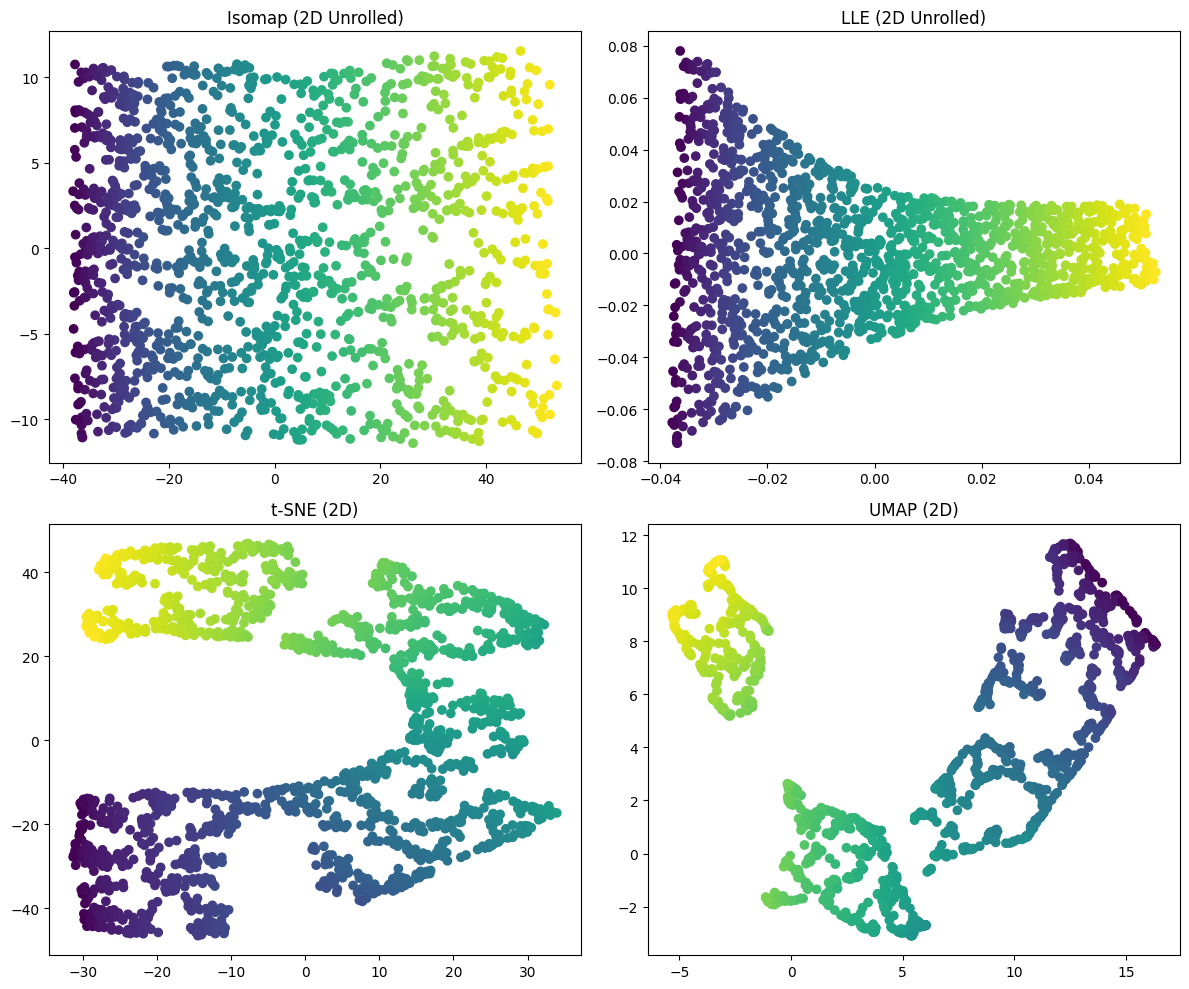

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import Isomap, LocallyLinearEmbedding, TSNE
import umap

# ---------------------------------------------------------
# 1. Load Dataset (Swiss Roll)
# ---------------------------------------------------------
n_samples = 1500
X, color = make_swiss_roll(n_samples, noise=0.05)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap='viridis')
ax.set_title("Swiss Roll Dataset (3D)")
plt.show()


# ---------------------------------------------------------
# 2. Apply Manifold Learning Algorithms
# ---------------------------------------------------------

# ---- ISOMAP ----
isomap = Isomap(n_neighbors=12, n_components=2)
X_isomap = isomap.fit_transform(X)

# ---- LLE ----
lle = LocallyLinearEmbedding(n_neighbors=12, n_components=2, method='standard')
X_lle = lle.fit_transform(X)

# ---- t-SNE ----
tsne = TSNE(n_components=2, perplexity=30, learning_rate='auto', init='random')
X_tsne = tsne.fit_transform(X)

# ---- UMAP ----
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
X_umap = umap_model.fit_transform(X)


# ---------------------------------------------------------
# 3. Plot Results
# ---------------------------------------------------------

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=color, cmap='viridis')
plt.title("Isomap (2D Unrolled)")

plt.subplot(2, 2, 2)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap='viridis')
plt.title("LLE (2D Unrolled)")

plt.subplot(2, 2, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap='viridis')
plt.title("t-SNE (2D)")

plt.subplot(2, 2, 4)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=color, cmap='viridis')
plt.title("UMAP (2D)")

plt.tight_layout()
plt.show()
